# SIPS: QUIP SERIES
This journal explores the case studies of the SIPS 2025 project understanding the implications of repowering and module reuse. This compliments analyses conducted in SAM and PV Watts. Below are the Residential, Commercial, and Utility scale case studies

In [1]:
#setup
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px

import PV_ICE

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'SIPS-Repowering')
#inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines'/'NRELStdScenarios')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
#altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("pyplot ", plt.matplotlib.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Python version  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.0.3
pyplot  3.7.2
PV_ICE version  


In [2]:
sim1 = PV_ICE.Simulation(name='SIPS', path=testfolder)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\SIPS-Repowering
Baseline folder directed to default:  C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\baselines


## Residential Case Study
This case study considers a residential system where the PV system is not at technical end of life (installed 2015), but the roof needs replacing in 2024. The owner has the option of keeping the old system or replacing the PV system.

In [3]:
#c-Si
MATERIALS = ['glass','aluminium_frames','silver','silicon', 'copper', 'encapsulant', 'backsheet']
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US_updatedT50T90.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

#CdTe
#MATERIALS_CdTe = ['glass_cdte','aluminium_frames_cdte', 'copper_cdte', 'encapsulant_cdte','cadmium','tellurium']
#moduleFile_CdTe = os.path.join(baselinesfolder, 'baseline_modules_mass_US_CdTe.csv')

In [4]:
#residential system parameters
resi_sys1_size = 0.00552 #MW, first system on roof (degrades to 5 kW in 2024 after 9 years (2024-2015))
resi_sys1_deg = 1.1 #%/yr, corresponds to 20 yr life
resi_sys1_life = 20 #years of life
resi_sys1_life_repower = 9 #years of life but remove for repowering
resi_sys1_eff = 19.02 #from SAM, PV ICE 2015 eff = 17%

resi_sys2_size = 0.0073 #MW, 2nd system on roof
resi_sys2_deg = 0.7 #%/yr, corresponds to 30 yr life
resi_sys2_life = 30 #years of life
resi_sys2_eff = 20.57 #from SAM, PV ICE 2024 eff = 22.4%

In [5]:
#Residential case study
sim1.createScenario(name='Resi_keep', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e) #create the scenario, name and mod file attach
for mat in MATERIALS:
    materialfile_m = os.path.join(baselinesfolder, 'baseline_material_mass_'+str(mat)+'.csv')
    materialfile_e = os.path.join(baselinesfolder, 'baseline_material_energy_'+str(mat)+'.csv')
    sim1.scenario['Resi_keep'].addMaterial(mat, massmatfile=materialfile_m, energymatfile=materialfile_e) # add all materials listed in MATERIALS

In [6]:
#Residential case study
sim1.createScenario(name='Resi_repower', massmodulefile=moduleFile_m, energymodulefile=moduleFile_e) #create the scenario, name and mod file attach
for mat in MATERIALS:
    materialfile_m = os.path.join(baselinesfolder, 'baseline_material_mass_'+str(mat)+'.csv')
    materialfile_e = os.path.join(baselinesfolder, 'baseline_material_energy_'+str(mat)+'.csv')
    sim1.scenario['Resi_repower'].addMaterial(mat, massmatfile=materialfile_m, energymatfile=materialfile_e) # add all materials listed in MATERIALS

idx_temp = pd.RangeIndex(start=2024,stop=2051,step=1) #create the index
CdTeRamp = pd.DataFrame(index=idx_temp, columns=['CdTe_deploy_[MWdc]'], dtype=float)
CdTeRamp.loc[2024] = 14000
CdTeRamp.loc[2030] = 50000#22000
CdTeRamp_full = round(CdTeRamp.interpolate(),0)
#CdTeRamp_full

In [7]:
#Modify the Scenario 
sim1.modifyScenario(scenarios='Resi_keep',stage='new_Installed_Capacity_[MW]', value=0, start_year=1995) #
#sim1.modifyScenario(scenarios='NAME',stage='new_Installed_Capacity_[MW]', value=0.005, start_year=2015) #5kW system installed in 2015
sim1.scenario['Resi_keep'].dataIn_m.loc[2015-1995, 'new_Installed_Capacity_[MW]'] = resi_sys1_size
sim1.scenario['Resi_keep'].dataIn_m.loc[2015-1995, 'mod_degradation'] = resi_sys1_deg
sim1.scenario['Resi_keep'].dataIn_m.loc[2015-1995, 'mod_lifetime'] = resi_sys1_life
sim1.scenario['Resi_keep'].dataIn_m.loc[2015-1995, 'mod_eff'] = resi_sys1_eff


In [8]:
#Modify the Scenario 
sim1.modifyScenario(scenarios='Resi_repower',stage='new_Installed_Capacity_[MW]', value=0, start_year=1995) #
#sim1.modifyScenario(scenarios='NAME',stage='new_Installed_Capacity_[MW]', value=0.005, start_year=2015) #5kW system installed in 2015
sim1.scenario['Resi_repower'].dataIn_m.loc[2015-1995, 'new_Installed_Capacity_[MW]'] = resi_sys1_size
sim1.scenario['Resi_repower'].dataIn_m.loc[2015-1995, 'mod_degradation'] = resi_sys1_deg
sim1.scenario['Resi_repower'].dataIn_m.loc[2015-1995, 'mod_lifetime'] = resi_sys1_life_repower
sim1.scenario['Resi_repower'].dataIn_m.loc[2015-1995, 'mod_eff'] = resi_sys1_eff

sim1.scenario['Resi_repower'].dataIn_m.loc[2024-1995, 'new_Installed_Capacity_[MW]'] = resi_sys2_size
sim1.scenario['Resi_repower'].dataIn_m.loc[2024-1995, 'mod_degradation'] = resi_sys2_deg
sim1.scenario['Resi_repower'].dataIn_m.loc[2024-1995, 'mod_lifetime'] = resi_sys2_life
sim1.scenario['Resi_repower'].dataIn_m.loc[2024-1995, 'mod_eff'] = resi_sys2_eff

In [9]:
#extend the analysis period for full energy calc
sim1.trim_Years(2010,2060)

Trimming and extending  Resi_keep
Resi_keep glass : Data trimmed for Energy, years now encompass  2010  to  2060
Resi_keep aluminium_frames : Data trimmed for Energy, years now encompass  2010  to  2060
Resi_keep silver : Data trimmed for Energy, years now encompass  2010  to  2060
Resi_keep silicon : Data trimmed for Energy, years now encompass  2010  to  2060
Resi_keep copper : Data trimmed for Energy, years now encompass  2010  to  2060
Resi_keep encapsulant : Data trimmed for Energy, years now encompass  2010  to  2060
Resi_keep backsheet : Data trimmed for Energy, years now encompass  2010  to  2060
Resi_keep backsheet : Data trimmed for Mass, years now encompass  2010  to  2060
Trimming and extending  Resi_repower
Resi_repower glass : Data trimmed for Energy, years now encompass  2010  to  2060
Resi_repower aluminium_frames : Data trimmed for Energy, years now encompass  2010  to  2060
Resi_repower silver : Data trimmed for Energy, years now encompass  2010  to  2060
Resi_repower

In [10]:
#do we also need a reuse scenario where both systems are used for full life? - wouldn't it just be additive?


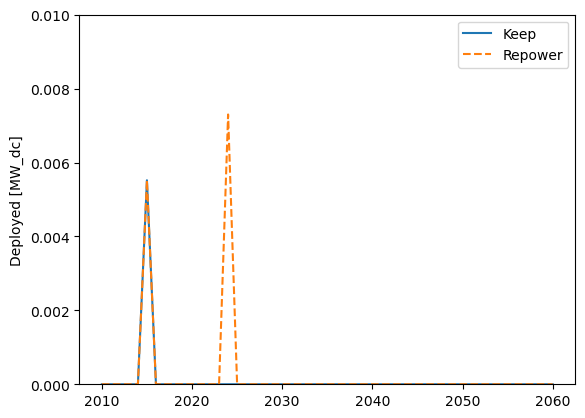

In [11]:
plt.plot(sim1.scenario['Resi_keep'].dataIn_m.loc[:, 'year'], 
         sim1.scenario['Resi_keep'].dataIn_m.loc[:, 'new_Installed_Capacity_[MW]'])
plt.plot(sim1.scenario['Resi_repower'].dataIn_m.loc[:, 'year'], 
         sim1.scenario['Resi_repower'].dataIn_m.loc[:, 'new_Installed_Capacity_[MW]'], ls='--')
plt.ylim(0,0.01)
plt.ylabel('Deployed [MW_dc]')
plt.legend(['Keep','Repower'])

In [12]:
sim1.calculateFlows()

>>>> Calculating Material Flows <<<<

Working on Scenario:  Resi_keep
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  Resi_keep  =  6.187774076971609e-05  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  Resi_keep  =  0.0010935552163411986  tonnes.
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
==> Working on Material :  backsheet
Working on Scenario:  Resi_repower
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Recycled surplus End of Sim for Mat  glass  Scenario  Resi_repower  =  9.177849870685457e-05  tonnes.
==> Working on Material :  aluminium_frames
Recycled surplus End of Sim for Mat  aluminium_frames  Scenario  Resi_repower  =  0.0010865892075838592  tonnes.
==> Work

In [13]:
sim1_yearly, sim1_cumu = sim1.aggregateResults()
sim1_allenergy, sim1_energyGen, sim1_energyDemands_all = sim1.aggregateEnergyResults()


C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scende_demands.loc[:,colname] = scende_demands.sum(axis=1) #sums module and material energy demands
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scende_demands.loc[:,colname] = scende_demands.sum(axis=1) #sums module and material energy demands


Text(0, 0.5, 'Decommissioned Capacity [kW_dc]')

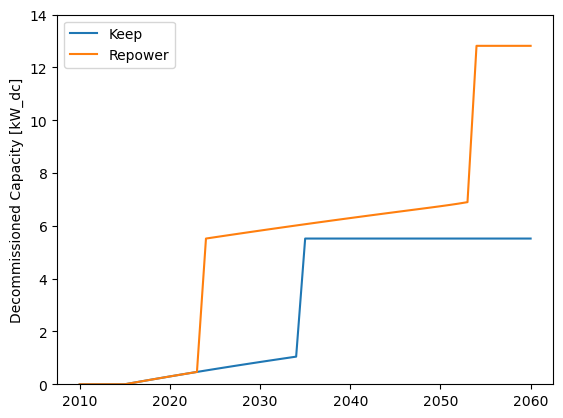

In [14]:
decommisioned = sim1_yearly.filter(like='Decommisioned')
plt.plot(decommisioned*1000)
plt.legend(['Keep','Repower'])
plt.ylim(0,14)
plt.ylabel('Decommissioned Capacity [kW_dc]')

Text(0, 0.5, 'Annual Energy Generation [MWh]')

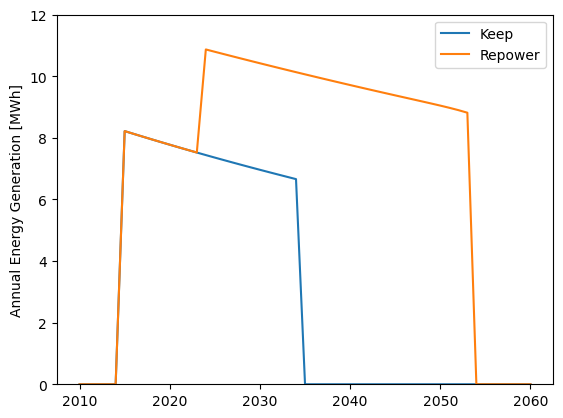

In [15]:
plt.plot(sim1_energyGen/1e6)
plt.legend(['Keep','Repower'])
plt.ylim(0,12.0)
plt.ylabel('Annual Energy Generation [MWh]')

In [16]:
cumu_energy_gen = sim1_energyGen.cumsum().loc[[2060]]
cumu_energy_gen_MWh = cumu_energy_gen/1e6
cumu_energy_gen_MWh.columns = ['Keep', 'Repower']
cumu_energy_gen_MWh.index=['Energy Gen [MWh]']
cumu_energy_gen_MWh

,Keep,Repower
Energy Gen [MWh],148.307821,365.792917


In [17]:
#sum the energy demands
energydemand_keep = sim1_energyDemands_all.filter(like='keep').sum(axis=1).sum()/1e6 #MWh
energydemand_repower = sim1_energyDemands_all.filter(like='repower').sum(axis=1).sum()/1e6 #MWh

In [18]:
cumu_energy_MWh = cumu_energy_gen_MWh.copy()
cumu_energy_MWh.loc['Energy Demand [MWh]','Keep'] = energydemand_keep
cumu_energy_MWh.loc['Energy Demand [MWh]','Repower'] = energydemand_repower
cumu_energy_MWh

,Keep,Repower
Energy Gen [MWh],148.307821,365.792917
Energy Demand [MWh],19.707823,36.604785


In [19]:
#EROI
cumu_energy_MWh.loc['EROI'] = cumu_energy_MWh.loc['Energy Gen [MWh]']/cumu_energy_MWh.loc['Energy Demand [MWh]']
cumu_energy_MWh

,Keep,Repower
Energy Gen [MWh],148.307821,365.792917
Energy Demand [MWh],19.707823,36.604785
EROI,7.525327,9.993035


In [20]:
#material demands
modmass_keep = sim1_yearly.loc[2015,'VirginStock_Module_SIPS_Resi_keep_[Tonnes]']
modmass_repower = sim1_yearly.loc[:,'VirginStock_Module_SIPS_Resi_repower_[Tonnes]'].sum()


In [21]:
#wastes
modwaste_keep = sim1_cumu.iloc[-1]['WasteAll_Module_SIPS_Resi_keep_[Tonnes]']
modwaste_repower = sim1_cumu.iloc[-1]['WasteAll_Module_SIPS_Resi_repower_[Tonnes]']


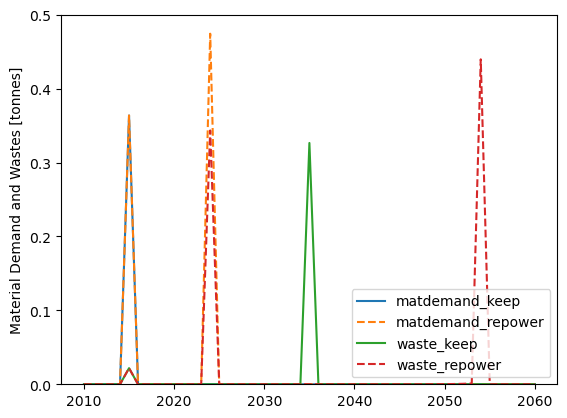

In [22]:
plt.plot(sim1_yearly.loc[:,'VirginStock_Module_SIPS_Resi_keep_[Tonnes]'], label = 'matdemand_keep')
plt.plot(sim1_yearly.loc[:,'VirginStock_Module_SIPS_Resi_repower_[Tonnes]'], ls='--', label = 'matdemand_repower')

plt.plot(sim1_yearly.loc[:,'WasteAll_Module_SIPS_Resi_keep_[Tonnes]'], label = 'waste_keep')
plt.plot(sim1_yearly.loc[:,'WasteAll_Module_SIPS_Resi_repower_[Tonnes]'], ls='--', label='waste_repower')

plt.ylim(0,0.5)
plt.ylabel('Material Demand and Wastes [tonnes]')
plt.legend()

In [23]:
cumu_metrics = cumu_energy_MWh.copy()
cumu_metrics.loc['Virgin Material Demands [tonnes]','Keep'] = modmass_keep
cumu_metrics.loc['Virgin Material Demands [tonnes]','Repower'] = modmass_repower
cumu_metrics.loc['Wastes [tonnes]', 'Keep'] = modwaste_keep
cumu_metrics.loc['Wastes [tonnes]', 'Repower'] = modwaste_repower

round(cumu_metrics,2)

,Keep,Repower
Energy Gen [MWh],148.31,365.79
Energy Demand [MWh],19.71,36.60
EROI,7.53,9.99
Virgin Material Demands [tonnes],0.36,0.84
Wastes [tonnes],0.35,0.81


In [24]:
sim1.calculateCarbonFlows()



>>>> Calculating Carbon Flows <<<<

Working on Scenario:  Resi_keep
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet
Working on Scenario:  Resi_repower
********************
Working on Carbon for Module
==> Working on Carbon for Material :  glass
==> Working on Carbon for Material :  aluminium_frames
==> Working on Carbon for Material :  silver
==> Working on Carbon for Material :  silicon
==> Working on Carbon for Material :  copper
==> Working on Carbon for Material :  encapsulant
==> Working on Carbon for Material :  backsheet


In [25]:
sim1.scenario['Resi_keep'].dataOut_c.head(60)

,China_mod_MFG_gCO2eq,India_mod_MFG_gCO2eq,Taiwan_mod_MFG_gCO2eq,Germany_mod_MFG_gCO2eq,Japan_mod_MFG_gCO2eq,South Korea_mod_MFG_gCO2eq,Canada_mod_MFG_gCO2eq,Mexico_mod_MFG_gCO2eq,USA_mod_MFG_gCO2eq,Viet Nam_mod_MFG_gCO2eq,...,El Salvador_mod_MFG_gCO2eq,Global_mod_MFG_gCO2eq,mod_Install_gCO2eq,mod_OandM_gCO2eq,mod_Repair_gCO2eq,mod_Demount_gCO2eq,mod_Store_gCO2eq,mod_Resell_Certify_gCO2eq,mod_ReMFG_Disassembly_gCO2eq,mod_Recycle_Crush_gCO2eq
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
5,12655.213437,4625.803216,3397.691758,1915.720326,451.930676,0.0,599.358296,1005.503556,0.0,0.0,...,182.834159,25540.198719,63.515419,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,7.030406e-15,0.0,0.0,0.0,2.974972e-14
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,3.148470e-13,0.0,0.0,0.0,1.332300e-12


# Commercial Case Study
This case study considers a set of commerical PV installations.

# Utility Case Study
This case study considers a set of utility scale PV installations.